In [15]:
from matplotlib.pyplot import figure
import math
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.bipartite as bipartite

**By Matthew Lucich**

### 1) Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

The dataset we will be exploring is a bipartite network of states and their accepted legal bases for divorce. The nine legal bases are: incompatibility, cruelty, desertion, nonsupport, alcohol, felony, impotence, insanity, and separation. The edges from a legal basis node to a state node represent the basis being accepted in that state. For example, Alabama is the one state (at the time this data was sourced) that approves all nine bases, while a state such as Colorado only accepts incompatibility. However, we should be careful to interpret states with less legal bases accepted as having a stricter approach to divorce, since incompatibility could be used as a general category for all divorce. The data comes from [Pajek datasets](http://vlado.fmf.uni-lj.si/pub/networks/data/) which originally comes from Julian Faraway (2006) and the description of the data is via [UC Irvine](https://networkdata.ics.uci.edu/netdata/html/divorce.html).

### Load & Visualize Data

In [16]:
fh = open("divorce-text.txt", "rb")
D = nx.read_edgelist(fh)

Below we can see the nodes are not yet labeled by type, this is something we will handle later by adding a "bipartite" attribute to the nodes.

In [17]:
print(D.nodes())

['Alabama', 'incompat', 'Alaska', 'Arizona', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New.Hampshire', 'New.Mexico', 'North.Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Rhode.Island', 'Tennessee', 'Texas', 'Washington', 'West.Virginia', 'Wisconsin', 'Wyoming', 'cruelty', 'Arkansas', 'Illinois', 'Maryland', 'New.Jersey', 'New.York', 'Pennsylvania', 'South.Carolina', 'South.Dakota', 'Utah', 'Vermont', 'Virginia', 'desertn', 'nonsupp', 'alcohol', 'felony', 'Louisiana', 'impotenc', 'North.Carolina', 'insanity', 'separate']


Let's quickly review the network, even before labeling the node types.

### Unipartite projection: Bases

Here we create a unipartite projection of the network around the basis nodes. We also calculate the degrees for each basis type and see all are connected with the other basis types, meaning there is at least two states that accept the legal basis and therefore share an edge.

In [18]:
basis = ["incompat","cruelty","desertn","nonsupp","alcohol","felony","impotenc","insanity","separate"]

In [19]:
B = bipartite.projected_graph(D, basis)
print()
print("Degrees, Club")
for b in basis:
    print(f"{B.degree(b)} {b}")


Degrees, Club
8 incompat
8 cruelty
8 desertn
8 nonsupp
8 alcohol
8 felony
8 impotenc
8 insanity
8 separate


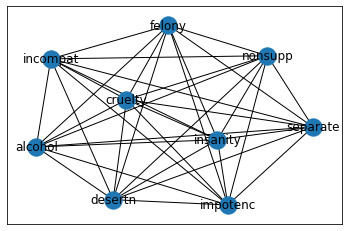

In [20]:
nx.draw_networkx(B)

### Unipartite projection: States

Here we create a unipartite projection of the network around the state nodes. We also calculate the degrees for each state and see that all have relatively high degrees (minimum is 30), meaning that states generally share at least one accepted legal basis for divorce.

In [21]:
states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New.Hampshire", "New.Jersey", "New.Mexico", "New.York", "North.Carolina", "North.Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode.Island", "South.Carolina", "South.Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West.Virginia", "Wisconsin", "Wyoming"]

In [22]:
S = bipartite.projected_graph(D, states)
print()
print("Degrees, Club")
for s in states:
    print(f"{S.degree(s)} {s}")


Degrees, Club
49 Alabama
49 Alaska
36 Arizona
39 Arkansas
43 California
36 Colorado
49 Connecticut
45 Delaware
43 Florida
49 Georgia
45 Hawaii
49 Idaho
31 Illinois
48 Indiana
36 Iowa
49 Kansas
36 Kentucky
35 Louisiana
48 Maine
39 Maryland
49 Massachusetts
36 Michigan
36 Minnesota
49 Mississippi
36 Missouri
36 Montana
36 Nebraska
47 Nevada
49 New.Hampshire
39 New.Jersey
47 New.Mexico
37 New.York
37 North.Carolina
49 North.Dakota
49 Ohio
49 Oklahoma
36 Oregon
35 Pennsylvania
49 Rhode.Island
36 South.Carolina
30 South.Dakota
49 Tennessee
49 Texas
35 Utah
39 Vermont
37 Virginia
45 Washington
49 West.Virginia
45 Wisconsin
47 Wyoming


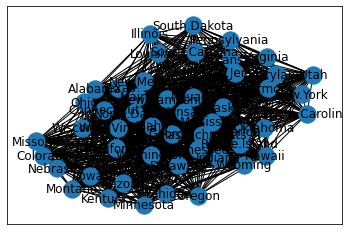

In [23]:
nx.draw_networkx(S)

### Convert to Bipartite

We convert the dataset into a bipartite network by applying a "bipartite" attribute to each node. A zero is applied if the node represents a state and a one is applied if the node represents a legal basis.

In [24]:
for state_basis in D.nodes:
    D.nodes[state_basis]["bipartite"] = 0 if state_basis in states else 1

In [25]:
print(D.nodes(data=True))

[('Alabama', {'bipartite': 0}), ('incompat', {'bipartite': 1}), ('Alaska', {'bipartite': 0}), ('Arizona', {'bipartite': 0}), ('California', {'bipartite': 0}), ('Colorado', {'bipartite': 0}), ('Connecticut', {'bipartite': 0}), ('Delaware', {'bipartite': 0}), ('Florida', {'bipartite': 0}), ('Georgia', {'bipartite': 0}), ('Hawaii', {'bipartite': 0}), ('Idaho', {'bipartite': 0}), ('Indiana', {'bipartite': 0}), ('Iowa', {'bipartite': 0}), ('Kansas', {'bipartite': 0}), ('Kentucky', {'bipartite': 0}), ('Maine', {'bipartite': 0}), ('Massachusetts', {'bipartite': 0}), ('Michigan', {'bipartite': 0}), ('Minnesota', {'bipartite': 0}), ('Mississippi', {'bipartite': 0}), ('Missouri', {'bipartite': 0}), ('Montana', {'bipartite': 0}), ('Nebraska', {'bipartite': 0}), ('Nevada', {'bipartite': 0}), ('New.Hampshire', {'bipartite': 0}), ('New.Mexico', {'bipartite': 0}), ('North.Dakota', {'bipartite': 0}), ('Ohio', {'bipartite': 0}), ('Oklahoma', {'bipartite': 0}), ('Oregon', {'bipartite': 0}), ('Rhode.Isla

States are represented in blue and legal bases are represented in red.

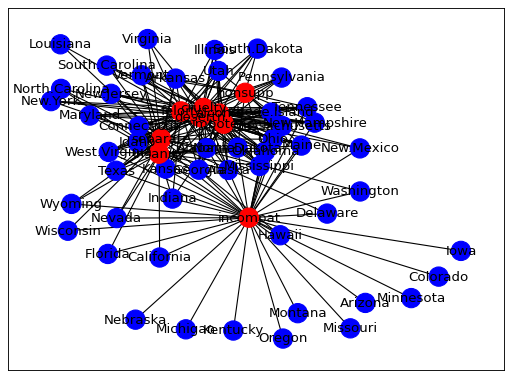

In [26]:
pos = nx.spring_layout(D, seed=648)
colors = {0: 'b', 1: 'r'}
figure(figsize=(8, 6), dpi=80)
nx.draw_networkx(D, pos=pos, node_color=[colors[D.nodes[node]['bipartite']] for node in D])
plt.show()

### 2) Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.


Below we plot a unipartite projection of the states with edge size and color being represented by weights of their edges. We can see from the resulting plot that states that only accept one legal basis, for example Nebraska, Arizona, and Colorado, are effectively disconnected from the network (when weights are applied). 

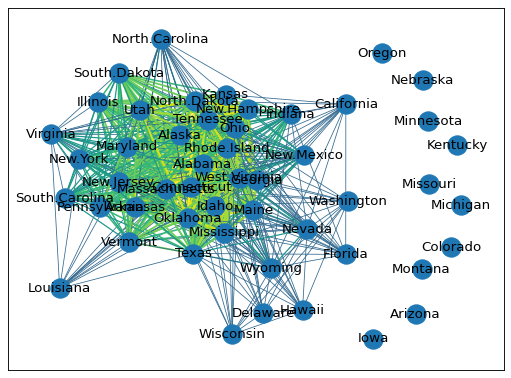

In [27]:
S2 = bipartite.weighted_projected_graph(D, states, ratio=False)
s2net = (S2.subgraph(c) for c in nx.connected_components(S2))
weights = [math.log(edata['weight']) for f, t, edata in S2.edges(data=True)]
figure(figsize=(8, 6), dpi=80)
nx.draw_networkx(S2, width=weights, edge_color=weights)

Next, we apply the island method and utilize the trim edges function provided in Chapter 5 of *Social Network Analysis for Startups*. The method prunes nodes with low connectivity to the rest of the network in order to highlight more distinct clusters. We choose a weight cut off of 1.0 since there is not a clear partition between 1.0 and the max weight (approx. 2.1).

In [28]:
def trim_edges(g, weight=1):
    """This function is sourced from chapter 5 of Social Network Analysis for Startups"""
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        print(f, to, edata)
        if edata['weight'] > weight:
            g2.add_edge(f, to, attr_dict = edata)
    return g2

(array([474.,   0.,   0., 170.,   0.,  91.,  75.,  86.,  92.,  70.]),
 array([0.        , 0.20794415, 0.41588831, 0.62383246, 0.83177662,
        1.03972077, 1.24766493, 1.45560908, 1.66355323, 1.87149739,
        2.07944154]),
 <BarContainer object of 10 artists>)

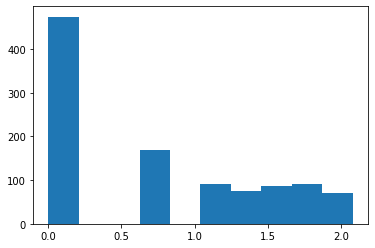

In [29]:
plt.hist(weights)

In [30]:
s2net_trim = trim_edges(S2, weight=math.exp(1))
weights = [math.log(edata['attr_dict']['weight']) for f, t, edata in s2net_trim.edges(data=True)]

Alabama Delaware {'weight': 2}
Alabama West.Virginia {'weight': 7}
Alabama South.Dakota {'weight': 5}
Alabama Texas {'weight': 6}
Alabama Mississippi {'weight': 7}
Alabama Nevada {'weight': 3}
Alabama Maryland {'weight': 6}
Alabama Maine {'weight': 7}
Alabama Connecticut {'weight': 8}
Alabama New.York {'weight': 4}
Alabama Hawaii {'weight': 2}
Alabama Arkansas {'weight': 8}
Alabama South.Carolina {'weight': 4}
Alabama Michigan {'weight': 1}
Alabama Colorado {'weight': 1}
Alabama Minnesota {'weight': 1}
Alabama California {'weight': 2}
Alabama Washington {'weight': 2}
Alabama Nebraska {'weight': 1}
Alabama Virginia {'weight': 3}
Alabama Ohio {'weight': 7}
Alabama Montana {'weight': 1}
Alabama Idaho {'weight': 8}
Alabama Kentucky {'weight': 1}
Alabama Utah {'weight': 7}
Alabama Indiana {'weight': 4}
Alabama Vermont {'weight': 6}
Alabama Missouri {'weight': 1}
Alabama Kansas {'weight': 7}
Alabama North.Dakota {'weight': 8}
Alabama New.Mexico {'weight': 3}
Alabama New.Jersey {'weight': 6}


Iowa Maine {'weight': 1}
Kansas West.Virginia {'weight': 6}
Kansas South.Dakota {'weight': 4}
Kansas Texas {'weight': 5}
Kansas Mississippi {'weight': 7}
Kansas Nevada {'weight': 2}
Kansas Maryland {'weight': 5}
Kansas Maine {'weight': 6}
Kansas New.York {'weight': 3}
Kansas South.Carolina {'weight': 3}
Kansas Michigan {'weight': 1}
Kansas Minnesota {'weight': 1}
Kansas Nebraska {'weight': 1}
Kansas Washington {'weight': 1}
Kansas Virginia {'weight': 2}
Kansas Ohio {'weight': 6}
Kansas Montana {'weight': 1}
Kansas Kentucky {'weight': 1}
Kansas Utah {'weight': 6}
Kansas Vermont {'weight': 4}
Kansas Missouri {'weight': 1}
Kansas North.Dakota {'weight': 7}
Kansas New.Mexico {'weight': 3}
Kansas New.Jersey {'weight': 5}
Kansas Massachusetts {'weight': 6}
Kansas Pennsylvania {'weight': 5}
Kansas Oklahoma {'weight': 7}
Kansas Tennessee {'weight': 6}
Kansas Wyoming {'weight': 2}
Kansas Oregon {'weight': 1}
Kansas Louisiana {'weight': 1}
Kansas Rhode.Island {'weight': 6}
Kansas North.Carolina 

Virginia Wisconsin {'weight': 1}
Washington West.Virginia {'weight': 2}
Washington Wyoming {'weight': 2}
Washington Wisconsin {'weight': 2}
West.Virginia Wyoming {'weight': 3}
West.Virginia Wisconsin {'weight': 2}
Wisconsin Wyoming {'weight': 2}


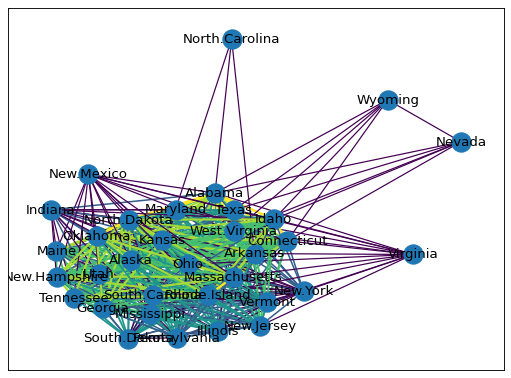

In [31]:
figure(figsize=(8, 6), dpi=80)
nx.draw_networkx(s2net_trim, width=weights, edge_color=weights)

The network was reduced to 33 nodes (states).

In [157]:
print(len(S.nodes()))
print(len(s2net_trim.nodes()))

50
33


We increase the weight cutoff to see if more distinct clusters appear.

In [186]:
s2net_trim2 = trim_edges(S2, weight=math.exp(1.5))
weights2 = [math.log(edata['attr_dict']['weight']) for f, t, edata in s2net_trim2.edges(data=True)]

Alabama South.Carolina {'weight': 4}
Alabama Connecticut {'weight': 8}
Alabama Massachusetts {'weight': 8}
Alabama North.Carolina {'weight': 3}
Alabama Mississippi {'weight': 7}
Alabama Colorado {'weight': 1}
Alabama West.Virginia {'weight': 7}
Alabama North.Dakota {'weight': 8}
Alabama Nebraska {'weight': 1}
Alabama Virginia {'weight': 3}
Alabama Montana {'weight': 1}
Alabama Idaho {'weight': 8}
Alabama Oklahoma {'weight': 8}
Alabama Minnesota {'weight': 1}
Alabama Arizona {'weight': 1}
Alabama Kentucky {'weight': 1}
Alabama Hawaii {'weight': 2}
Alabama Kansas {'weight': 7}
Alabama Missouri {'weight': 1}
Alabama Vermont {'weight': 6}
Alabama Arkansas {'weight': 8}
Alabama Louisiana {'weight': 2}
Alabama Ohio {'weight': 7}
Alabama Nevada {'weight': 3}
Alabama South.Dakota {'weight': 5}
Alabama Wisconsin {'weight': 2}
Alabama Georgia {'weight': 7}
Alabama New.Mexico {'weight': 3}
Alabama Michigan {'weight': 1}
Alabama Pennsylvania {'weight': 5}
Alabama Tennessee {'weight': 7}
Alabama Ne

Maine New.Mexico {'weight': 3}
Maine Michigan {'weight': 1}
Maine Pennsylvania {'weight': 4}
Maine Tennessee {'weight': 6}
Maine New.Jersey {'weight': 4}
Maine Rhode.Island {'weight': 6}
Maine Texas {'weight': 4}
Maine Wyoming {'weight': 2}
Maine Maryland {'weight': 4}
Maine Washington {'weight': 1}
Maine New.Hampshire {'weight': 6}
Maine Utah {'weight': 6}
Maine New.York {'weight': 2}
Maine Oregon {'weight': 1}
Maryland South.Carolina {'weight': 3}
Maryland Massachusetts {'weight': 5}
Maryland North.Carolina {'weight': 3}
Maryland Mississippi {'weight': 5}
Maryland West.Virginia {'weight': 5}
Maryland North.Dakota {'weight': 5}
Maryland Virginia {'weight': 3}
Maryland Oklahoma {'weight': 5}
Maryland Vermont {'weight': 5}
Maryland Ohio {'weight': 5}
Maryland Nevada {'weight': 2}
Maryland South.Dakota {'weight': 3}
Maryland Wisconsin {'weight': 1}
Maryland New.Mexico {'weight': 2}
Maryland Pennsylvania {'weight': 5}
Maryland Texas {'weight': 5}
Maryland New.Jersey {'weight': 5}
Maryland

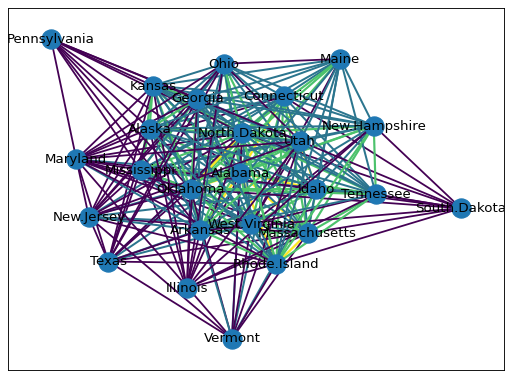

In [187]:
figure(figsize=(8, 6), dpi=80)
nx.draw_networkx(s2net_trim2, width=weights2, edge_color=weights2)

### 3) What can you infer about each of the distinct groups?

Since there are not multiple clear clusters and the main cluster is dense, we can infer that most states accept a high number of legal bases and  most often they are the same legal bases other states accept. The island method, when applied with different weight cutoffs, generally prunes states that accept a low number of the bases (e.g states that accepted only incompatability). Then, with subsequent weight cutoff adjustments we would see states with only 2 or 3 accepted bases be trimmed. Each time slight outlier nodes would appear farther from the main cluster indicating low overlap with the number and type of bases accepted by the states in the main cluster. While distinct clusters did not appear when applying our highest weight threshold of 1.5, we do see a dense sub-cluster emerge around states like Connecticut, North Dakota, Utah, Alabama, and Idaho. This makes sense as Alabama is the only state that accepts all bases and the other states mentioned accept eight bases. Again, we should be careful to assume accepting more bases means there is a less-strict approach to divorce in those states, as a basis such as incompatability can potentially be used as catch-all in states that only accept one basis.

### References

*Social Network Analysis for Startups* by Maksim Tsvetovat, Alexander Kouznetsov <br> 
Legal basis for divorce in the USA, UC Irvine: https://networkdata.ics.uci.edu/netdata/html/divorce.html <br>
NetworkX Official Documentation: https://networkx.org/documentation/stable/index.html <br>
Pajek datasets: http://vlado.fmf.uni-lj.si/pub/networks/data/